# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

df_sat_2017 = pd.read_csv('/Users/michaelhoppes/general_assembly/project-1/data/sat_2017.csv')
df_act_2017 = pd.read_csv('/Users/michaelhoppes/general_assembly/project-1/data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
df_act_2017.shape

(52, 7)

In [6]:
df_sat_2017.shape

(51, 5)

Answer: 

There are two data frames, one containing aggregate state/national ACT Scores, and the other containing just state, no national, aggregate SAT scores. The standardized tests examine different subject groupings. The SAT tests 'Math' and 'Evidence-Based Reading and Writing', while also providing a composite which is just the raw sum of those two scores. The ACT on the other hand breaks it's test out into 4 measures: 'Science', 'Math', 'Reading', and 'English'. It's not clear by the composite score exactly how it is calculated.



#### 4a. Does the data look complete? 

Answer: The SAT is missing the national benchmark. This is a problem because the data is already pre-aggregated, so taking the average of averages would not necessarily give us the proper national benchmark. This makes it difficult to compare state vs. national performance, although an alternative comparison would be to use a box plot and compare the state against the median in the distribution.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The minimum value for the ACT is 1 while the maximum is 36. For the SAT the minimum for each section is a 200 while the maximum possible for each section is a 800. The range of possible combined scores are 400-1600.

In [7]:
print(df_sat_2017['Evidence-Based Reading and Writing'].min())
print(df_sat_2017['Evidence-Based Reading and Writing'].max())

print(df_sat_2017['Math'].min())
print(df_sat_2017['Math'].max())


print(df_act_2017['Reading'].min())
print(df_act_2017['Reading'].max())

print(df_act_2017['English'].min())
print(df_act_2017['English'].max())

print(df_act_2017['Science'].min())
print(df_act_2017['Science'].max())

print(df_act_2017['Math'].min())
print(df_act_2017['Math'].max())

482
644
52
651
18.1
26.0
16.3
25.5
2.3
24.9
18.0
25.3


In [8]:
df_sat_2017.sort_values(by='Math').head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
df_sat_2017 = df_sat_2017.replace(52,524)

In [10]:
df_act_2017 = df_act_2017.replace(2.3,23.2)

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
df_act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [12]:
df_sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

The composite in the ACT dataframe is an object class while it should be a float. 

The participation columns on both data sets are objects because they are using the percentage sign to make the values more interpretable. That being said, they would need to be converted to floats or integers if you wanted to analyze the relationships between participation and other variables.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
df_act_2017['Composite'][51] = '20.2'

/Users/michaelhoppes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_act_2017['Composite'][51]


'20.2'

In [15]:
df_act_2017['Composite'] = pd.to_numeric(df_act_2017['Composite'])

In [16]:
df_sat_2017['Participation'] = df_sat_2017['Participation'].str.replace('%',"",regex=False)

In [17]:

df_act_2017['Participation'] = df_act_2017['Participation'].str.replace('%',"",regex=False) 

In [18]:
df_act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [19]:
df_sat_2017['Participation'] = pd.to_numeric(df_sat_2017['Participation'])

df_act_2017['Participation'] = pd.to_numeric(df_act_2017['Participation'])

- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
df_act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [21]:
df_sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [22]:
act_col_names = ['state', 'act_participation','act_english','act_math','act_reading','act_science','act_composite']

In [23]:
sat_col_names = ['state', 'sat_participation', 'sat_evidence_based_reading_writing','sat_math','sat_total']

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [24]:
df_act_2017.columns = (act_col_names)
df_sat_2017.columns =(sat_col_names)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|Both|States and the District of Columbia| 
|**sat_participation**|*float*|SAT|State level aggregate participation for eligible students to take the SATs|
|**sat_evidence_based_reading_and_writing**|*integer*|SAT|Reading and Writing Section Scores on a 200-800 point scale. Aggregated by State|
|**sat_math**|*integer*|SAT|Math Section Scores on a 200-800 point scale. Aggregated by State|
|**sat_total**|*integer*|SAT|Total combined math and evidence based reading and writing scores on a 400-1600 point scale. Aggregated by State|
|**act_participation**|*float*|ACT|State level aggregate participation for eligible students to take the ACTs|
|**act_english**|*float*|ACT|English Section Scores on a 1-36 point scale. Aggregated by State|
|**act_math**|*float*|ACT|Math Section Scores on a 1-36 point scale. Aggregated by State|
|**act_reading**|*float*|ACT|Reading Section Scores on a 1-36 point scale. Aggregated by State|
|**act_science**|*float*|ACT|Science Section Scores on a 1-36 point scale. Aggregated by State|
|**act_composite**|*float*|ACT|Total combined math and evidence based reading and writing scores on a 400-1600 point scale. Aggregated by State|
|**year**|*integer*|Both|Year testing administered|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
## Assuming this is national

df_act_2017 = df_act_2017.drop(df_act_2017.index[0])

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Code:

df_combined = df_act_2017.merge(df_sat_2017, left_on='state', right_on = 'state', how ='left')
df_combined.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_evidence_based_reading_writing,sat_math,sat_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


In [27]:
df_combined['year'] = 2017

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
df_combined.to_csv(path_or_buf='/Users/michaelhoppes/general_assembly/project-1/data/combined_2017.csv', sep=',')



## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
act_2018 = pd.read_csv('/Users/michaelhoppes/Downloads/east_coast_data_entry_-_act_2018.csv')
sat_2018 = pd.read_csv('/Users/michaelhoppes/Downloads/east_coast_data_entry_-_sat_2018.csv')


In [30]:
## look at data

print(act_2018.head())

print(sat_2018.head())

        State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1168
4  California           60%                                 540   536   1076


In [31]:
sat_2018.columns = (sat_col_names)

In [32]:
act_2018.shape

## 2018 only has 3 columns. 

(52, 3)

In [33]:
sat_2018.shape

(52, 5)

In [34]:
## Making list of new column names. Same names as 2017 table. 

act_col_2018 = ['state', 'act_participation', 'act_composite']

In [35]:
# Changing column names

act_2018.columns = act_col_2018

In [36]:
# Checking variable types. Participation needs to be changed to int.
act_2018.dtypes

state                 object
act_participation     object
act_composite        float64
dtype: object

In [37]:
# Checking SAT Variable types. sat_participation needs to be changed. 
sat_2018.dtypes

state                                 object
sat_participation                     object
sat_evidence_based_reading_writing     int64
sat_math                               int64
sat_total                              int64
dtype: object

In [38]:
## Removing % character and converting participation metrics to 

sat_2018['sat_participation'] = sat_2018['sat_participation'].str.replace('%',"",regex=False) 
act_2018['act_participation'] = act_2018['act_participation'].str.replace('%',"",regex=False) 
act_2018['act_participation'] = pd.to_numeric(act_2018['act_participation'])
sat_2018['sat_participation'] = pd.to_numeric(sat_2018['sat_participation'])

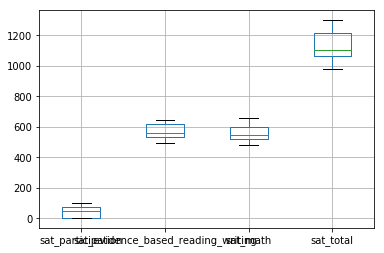

In [39]:
## Using boxplots to look for outliers

sat_2018.boxplot()

In [40]:
## looking at min and max values for outliers
sat_2018.describe()

,sat_participation,sat_evidence_based_reading_writing,sat_math,sat_total
count,52.000000,52.000000,52.000000,52.000000
mean,45.346154,567.711538,558.442308,1126.153846
std,36.941865,44.864649,48.977551,93.513632
min,2.000000,497.000000,480.000000,977.000000
25%,4.750000,535.000000,521.750000,1063.500000
50%,49.500000,558.000000,547.000000,1102.500000
75%,76.750000,615.750000,598.000000,1215.000000
max,100.000000,643.000000,655.000000,1298.000000


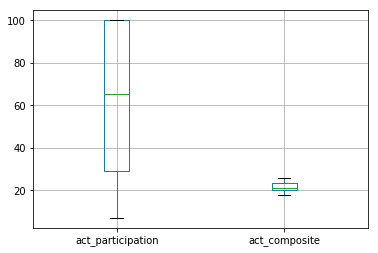

In [41]:
## Using boxplots to look for outliers

act_2018.boxplot()

In [42]:
## Mins and Maxes look good
act_2018.describe()

,act_participation,act_composite
count,52.000000,52.000000
mean,61.500000,21.496154
std,33.740939,2.090779
min,7.000000,17.700000
25%,29.250000,19.975000
50%,65.500000,21.300000
75%,100.000000,23.625000
max,100.000000,25.600000


In [43]:
## Join SAT and ACT datasets

df_combined_2018 = act_2018.merge(sat_2018, left_on='state', right_on = 'state', how ='left')

In [44]:
## Add year column

df_combined_2018['year'] = 2018
df_combined_2018.head()

,state,act_participation,act_composite,sat_participation,sat_evidence_based_reading_writing,sat_math,sat_total,year
0,Alabama,100,19.1,6.0,595.0,571.0,1166.0,2018
1,Alaska,33,20.8,43.0,562.0,544.0,1106.0,2018
2,Arizona,66,19.2,29.0,577.0,572.0,1149.0,2018
3,Arkansas,100,19.4,5.0,592.0,576.0,1168.0,2018
4,California,27,22.7,60.0,540.0,536.0,1076.0,2018


In [45]:
df_combined_2018.head(10)

,state,act_participation,act_composite,sat_participation,sat_evidence_based_reading_writing,sat_math,sat_total,year
0,Alabama,100,19.1,6.0,595.0,571.0,1166.0,2018
1,Alaska,33,20.8,43.0,562.0,544.0,1106.0,2018
2,Arizona,66,19.2,29.0,577.0,572.0,1149.0,2018
3,Arkansas,100,19.4,5.0,592.0,576.0,1168.0,2018
4,California,27,22.7,60.0,540.0,536.0,1076.0,2018
5,Colorado,30,23.9,28.0,519.0,506.0,1025.0,2018
6,Connecticut,26,25.6,100.0,535.0,519.0,1054.0,2018
7,Delaware,17,23.8,100.0,505.0,492.0,997.0,2018
8,"Washington, D.C.",32,23.6,NaN,NaN,NaN,NaN,2018
9,Florida,66,19.9,97.0,522.0,493.0,1015.0,2018


In [46]:
## Replace Washington DC with District of Columbia on both data sets

df_combined_2018 = df_combined_2018.replace('Washington, D.C.','District of Columbia')
df_combined = df_combined.replace('Washington, D.C.','District of Columbia')

In [47]:
df_combined_2018 = df_combined_2018[(df_combined_2018['state']) != 'National']

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [48]:
df_combined_both = pd.concat([df_combined, df_combined_2018], axis=0, sort=False)
df_combined_both.reset_index()
df_combined_both = df_combined.loc[:, df_combined.columns != 'index']

In [49]:
df_combined_both.shape

(51, 12)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
df_combined_both.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_evidence_based_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
xy=[4,4,5]

In [52]:
np.std(xy)

0.4714045207910317

In [53]:
def st_dev(data):
    empty_list = []
    data_mean =np.mean(data)
    for i in data:
        x =  (i - data_mean)**2
        empty_list = empty_list + [x]
    mean_of_squares = np.mean(empty_list)
    return mean_of_squares**.5   
    

In [54]:
st_dev(xy)

0.4714045207910317

In [55]:
st_dev (df_combined_both['act_participation'])

31.824175751231806

In [56]:
df_combined_both.to_csv(path_or_buf='/Users/michaelhoppes/general_assembly/project-1/data/combined_both.csv', sep=',')


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [57]:
##{k:v for i in } Brian to send link

## don't know how to do this on pandas frame

#sd = {k:st_dev(v) for (k,v) in zip( ,)}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [58]:
df_combined_2018.dtypes

state                                  object
act_participation                       int64
act_composite                         float64
sat_participation                     float64
sat_evidence_based_reading_writing    float64
sat_math                              float64
sat_total                             float64
year                                    int64
dtype: object

In [59]:
#### Making a 2017 data frame
combined_2017 = df_combined_both.loc[df_combined_both.year == 2017,:]

In [60]:
grouped_2018 = df_combined_2018.groupby(['state','year'])['sat_participation','act_participation','act_composite','sat_total'].max().reset_index()
grouped_2018.sort_values('sat_participation',ascending = False).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
22,Michigan,2018,100.0,22,24.2,1010.0
6,Connecticut,2018,100.0,26,25.6,1054.0
7,Delaware,2018,100.0,17,23.8,997.0
12,Idaho,2018,100.0,36,22.3,1001.0
19,Maine,2018,99.0,7,24.0,1013.0


#### In 2018 Michigan, Connecticut, Delaware and Maine all had 100% SAT participation.

In [61]:
grouped_2018.sort_values('sat_participation',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
34,North Dakota,2018,2.0,98,20.3,1283.0
50,Wyoming,2018,3.0,100,20.0,1258.0
41,South Dakota,2018,3.0,77,21.9,1240.0
27,Nebraska,2018,3.0,100,20.1,1252.0
49,Wisconsin,2018,3.0,100,20.5,1294.0


#### In 2018 North Dakota had the lowest SAT participation at 2%, with 4 others sporting rates at 3%.

In [62]:
grouped_2018.sort_values('act_participation',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
19,Maine,2018,99.0,7,24.0,1013.0
39,Rhode Island,2018,97.0,15,24.2,1018.0
29,New Hampshire,2018,96.0,16,25.1,1073.0
7,Delaware,2018,100.0,17,23.8,997.0
38,Pennsylvania,2018,70.0,20,23.5,1086.0


## In 2018 Maine had the lowest ACT participation at 7%

In [63]:
grouped_2018.sort_values('act_participation',ascending = False).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
0,Alabama,2018,6.0,100,19.1,1166.0
17,Kentucky,2018,4.0,100,20.2,1248.0
49,Wisconsin,2018,3.0,100,20.5,1294.0
44,Utah,2018,4.0,100,20.4,1230.0
42,Tennessee,2018,6.0,100,19.6,1231.0


#### Minnesota had the highest SAT average with Wisconsin not far behind

In [64]:
grouped_2018.sort_values('sat_total',ascending = False).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
23,Minnesota,2018,4.0,99,21.3,1298.0
49,Wisconsin,2018,3.0,100,20.5,1294.0
34,North Dakota,2018,2.0,98,20.3,1283.0
25,Missouri,2018,4.0,100,20.0,1272.0
15,Iowa,2018,3.0,68,21.8,1265.0


#### Minnesota had the highest SAT average with Wisconsin not far behind

In [65]:
grouped_2018.sort_values('sat_total',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
7,Delaware,2018,100.0,17,23.8,997.0
48,West Virginia,2018,28.0,65,20.3,999.0
12,Idaho,2018,100.0,36,22.3,1001.0
22,Michigan,2018,100.0,22,24.2,1010.0
19,Maine,2018,99.0,7,24.0,1013.0


#### Two states had SAT totals below 1000, with Delaware being the lowest at 997

In [66]:
grouped_2018.sort_values('act_composite',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
28,Nevada,2018,23.0,100,17.7,1140.0
40,South Carolina,2018,55.0,100,18.3,1106.0
24,Mississippi,2018,4.0,100,18.6,1262.0
11,Hawaii,2018,56.0,89,18.9,1099.0
0,Alabama,2018,6.0,100,19.1,1166.0


### Nevada had the lowest ACT composite at 17.7

In [67]:
grouped_2018.sort_values('act_composite',ascending = False).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
6,Connecticut,2018,100.0,26,25.6,1054.0
21,Massachusetts,2018,80.0,25,25.5,1125.0
29,New Hampshire,2018,96.0,16,25.1,1073.0
32,New York,2018,79.0,27,24.5,1068.0
22,Michigan,2018,100.0,22,24.2,1010.0


## Connecticut had the highest ACT composite rates @ 25.6 in 2018

In [68]:
grouped_2017 = combined_2017.groupby(['state','year'])['sat_participation','act_participation','act_composite','sat_total'].max().reset_index()
grouped_2017.sort_values('sat_participation',ascending = False).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
8,District of Columbia,2017,100,32,24.2,950
22,Michigan,2017,100,29,24.1,1005
6,Connecticut,2017,100,31,25.2,1041
7,Delaware,2017,100,18,24.1,996
29,New Hampshire,2017,96,18,25.5,1052


#### In 2017 Michigan, Connecticut, Delaware and Maine all had 100% SAT participation.

### Maine had 100% in 2018 but not 2017. District of Columbia not in 2018 data

In [69]:
grouped_2017.sort_values('sat_participation',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
34,North Dakota,2017,2,98,20.3,1256
24,Mississippi,2017,2,100,18.6,1242
15,Iowa,2017,2,67,21.9,1275
25,Missouri,2017,3,100,20.4,1271
44,Utah,2017,3,100,20.3,1238


#### In 2017 North Dakota, Iowa and Mississippi all had sat participation scores of 2%

In [70]:
grouped_2017.sort_values('act_participation',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
19,Maine,2017,95,8,24.3,1012
29,New Hampshire,2017,96,18,25.5,1052
7,Delaware,2017,100,18,24.1,996
39,Rhode Island,2017,71,21,24.0,1062
38,Pennsylvania,2017,65,23,23.7,1071


## In 2017 Maine had the lowest ACT participation at 8%

In [71]:
grouped_2018.sort_values('sat_participation',ascending = False).head(18)

,state,year,sat_participation,act_participation,act_composite,sat_total
22,Michigan,2018,100.0,22,24.2,1010.0
6,Connecticut,2018,100.0,26,25.6,1054.0
7,Delaware,2018,100.0,17,23.8,997.0
12,Idaho,2018,100.0,36,22.3,1001.0
19,Maine,2018,99.0,7,24.0,1013.0
13,Illinois,2018,99.0,43,23.9,1019.0
39,Rhode Island,2018,97.0,15,24.2,1018.0
9,Florida,2018,97.0,66,19.9,1015.0
29,New Hampshire,2018,96.0,16,25.1,1073.0
30,New Jersey,2018,82.0,31,23.7,1094.0


In [72]:
grouped_2017.sort_values('sat_participation',ascending = False).head(18)

,state,year,sat_participation,act_participation,act_composite,sat_total
8,District of Columbia,2017,100,32,24.2,950
22,Michigan,2017,100,29,24.1,1005
6,Connecticut,2017,100,31,25.2,1041
7,Delaware,2017,100,18,24.1,996
29,New Hampshire,2017,96,18,25.5,1052
19,Maine,2017,95,8,24.3,1012
12,Idaho,2017,93,38,22.3,1005
9,Florida,2017,83,73,19.8,1017
21,Massachusetts,2017,76,29,25.4,1107
39,Rhode Island,2017,71,21,24.0,1062


#### 17 schools w/ 100% act participation

In [73]:
grouped_2017.sort_values('sat_total',ascending = False).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
23,Minnesota,2017,3,100,21.5,1295
49,Wisconsin,2017,3,100,20.5,1291
15,Iowa,2017,2,67,21.9,1275
25,Missouri,2017,3,100,20.4,1271
16,Kansas,2017,4,73,21.7,1260


## Minnesota had the highest SAT total score in 2017

In [74]:
grouped_2017.sort_values('sat_total',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
8,District of Columbia,2017,100,32,24.2,950
7,Delaware,2017,100,18,24.1,996
12,Idaho,2017,93,38,22.3,1005
22,Michigan,2017,100,29,24.1,1005
19,Maine,2017,95,8,24.3,1012


#### District of Columbia had the lowest SAT score at 950

In [75]:
grouped_2017.sort_values('act_composite',ascending = True).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
28,Nevada,2017,26,100,17.8,1116
24,Mississippi,2017,2,100,18.6,1242
40,South Carolina,2017,50,100,18.7,1064
11,Hawaii,2017,55,90,19.0,1085
33,North Carolina,2017,49,100,19.1,1081


### Nevada had the lowest ACT composite at 17.8 in 2017

In [76]:
grouped_2017.sort_values('act_composite',ascending = False).head()

,state,year,sat_participation,act_participation,act_composite,sat_total
29,New Hampshire,2017,96,18,25.5,1052
21,Massachusetts,2017,76,29,25.4,1107
6,Connecticut,2017,100,31,25.2,1041
19,Maine,2017,95,8,24.3,1012
8,District of Columbia,2017,100,32,24.2,950


## New Hampshire had the highest ACT composite rates @ 25.5 in 2017

In [77]:
df_combined_both.loc[(df_combined_both['sat_participation'] > 50) & (df_combined_both['act_participation']>50)]

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_evidence_based_reading_writing,sat_math,sat_total,year
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,1017,2017
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,1050,2017
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,1085,2017


Do any states with 100% participation on a given test have a rate change year-to-year?

Ohio got to 100% ACT participation in 2018, while Colorado went from 100% ACT participation to less than that in 2018.

Idaho  increased from 93% participation in 2017 to 100% participation in 2018.

Do any states show have >50% participation on both tests either year?
Based on what you've just observed, have you identified any states that you're especially interested in? 

It looks like the only Florida, Georgia and Hawaii in 2017 had greater that 50% participation in a single year. 

Colorado and Ohio for the significant change are interesting. Something must have happened to have that drastic of a difference.

Make a note of these and state why you think they're interesting

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

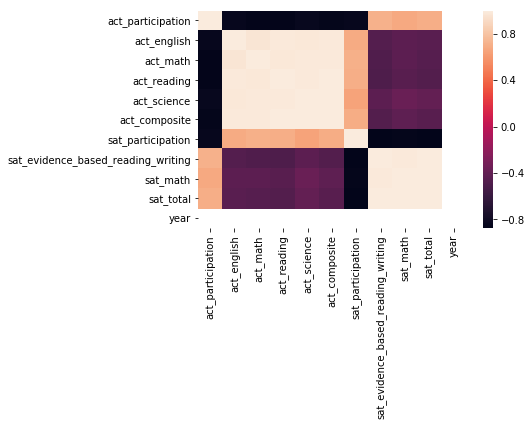

In [78]:
sns.heatmap(df_combined.corr())

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [79]:
# def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols = 2, figsize =(15,6*nrows)) 
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists #enumerate is creating an index number
#         ax[i].hist(dataframe[column]) # feel free to add more settings
#         ax[i].set_xlabel(x_label)
#         ax[i].set_ylabel(y_label)
#         ax[i].set_title(i)
#                 # Set titles, labels, etc here for each subplot



In [94]:
df_combined_2018.dtypes

state                                  object
act_participation                       int64
act_composite                         float64
sat_participation                     float64
sat_evidence_based_reading_writing    float64
sat_math                              float64
sat_total                             float64
year                                    int64
dtype: object

In [100]:
column_list = list(df_combined_2018.columns.values)


In [101]:
column_list.remove('year')
column_list.remove('state')

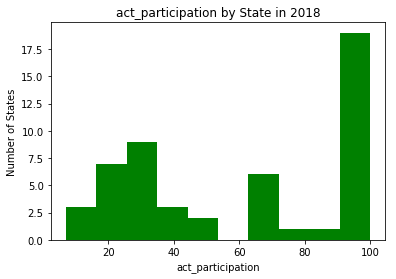

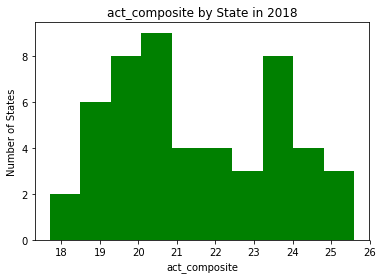

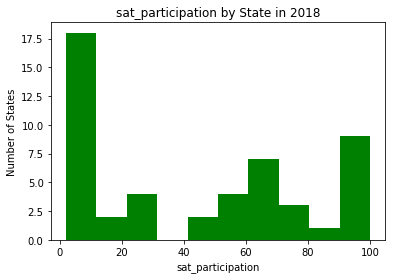

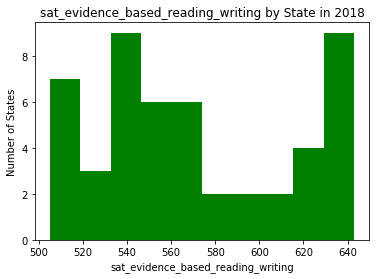

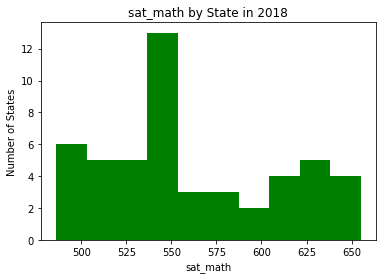

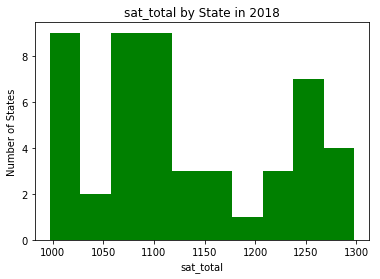

In [104]:
## practicing plot in matplotlib
for i in column_list:
    plt.xlabel(f'{i}')
    plt.ylabel ('Number of States')
    plt.title(f'{i} by State in 2018')
    plt.hist(
        x= df_combined_2018[i],
        bins = 10,
        align = 'mid',
        color = 'g',  )
    plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

/Users/michaelhoppes/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


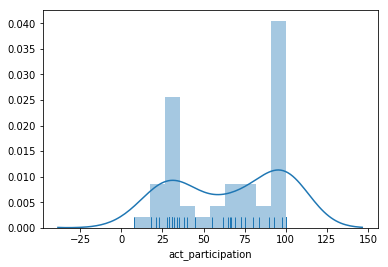

In [81]:
sns.distplot(df_combined_both['act_participation'], bins = 10, kde = True, rug = True)

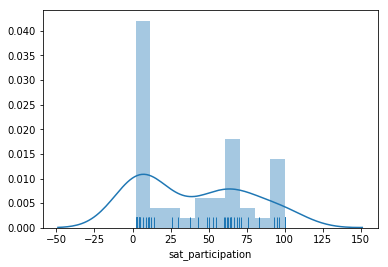

In [82]:
sns.distplot(df_combined_both['sat_participation'], bins = 10, kde = True, rug = True)

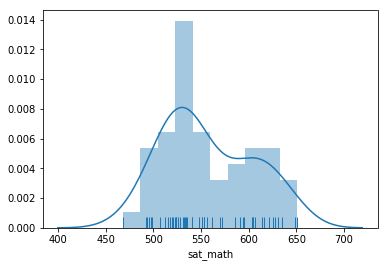

In [83]:
sns.distplot(df_combined_both['sat_math'], bins = 10, kde = True, rug = True)

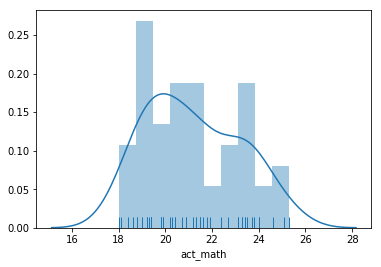

In [84]:
sns.distplot(df_combined_both['act_math'], bins = 10, kde = True, rug = True)

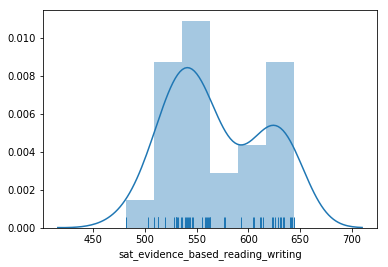

In [85]:
sns.distplot(df_combined_both['sat_evidence_based_reading_writing'], bins = 6, kde = True, rug = True)

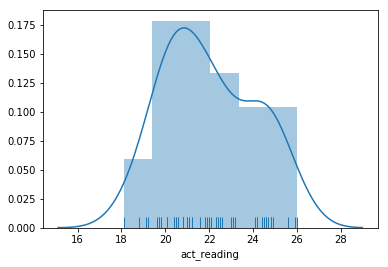

In [86]:
sns.distplot(df_combined_both['act_reading'], bins = 6, kde = True, rug = True)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, '2017 Math Scores')

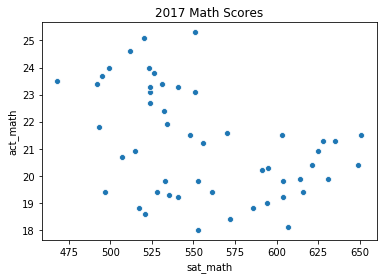

In [87]:
## 2017 Math scores
sns.scatterplot(x="sat_math",y="act_math",data=combined_2017).set_title('2017 Math Scores')

Text(0.5, 1.0, '2017 Reading Scores')

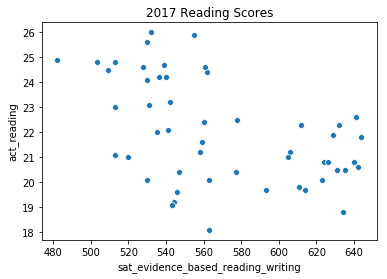

In [88]:
## 2017 Math scores
sns.scatterplot(x="sat_evidence_based_reading_writing",y="act_reading",data=combined_2017).set_title('2017 Reading Scores')

Text(0.5, 1.0, '2017 Total Composite Scores')

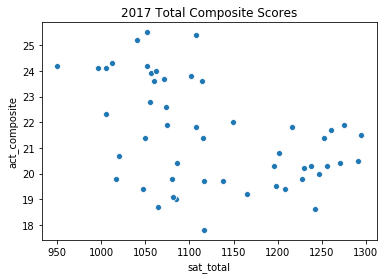

In [89]:
## 2017 Math scores
sns.scatterplot(x="sat_total",y="act_composite",data=combined_2017).set_title('2017 Total Composite Scores')

See PDF for year over year changes in test scores.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

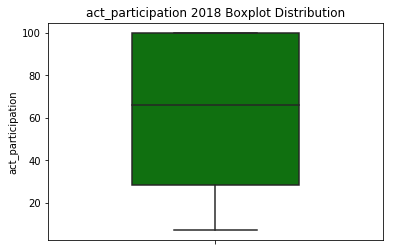

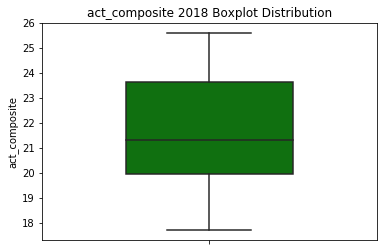

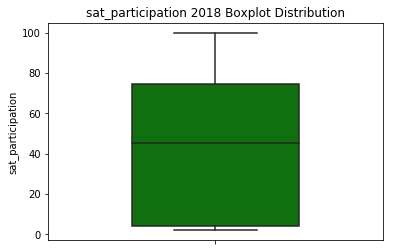

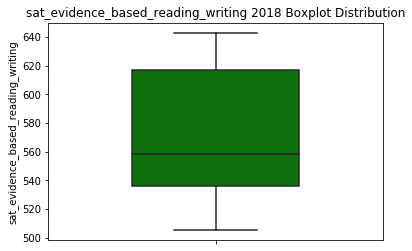

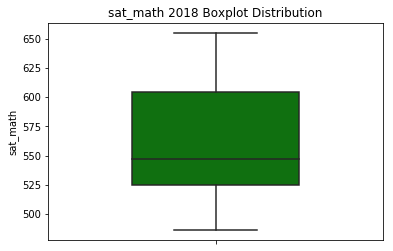

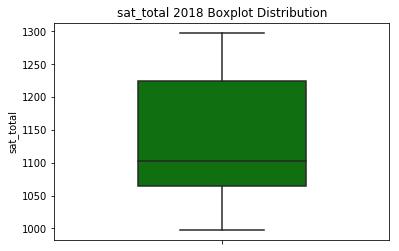

In [114]:
for i in column_list:
    plt.figure(i)
    sns.boxplot(df_combined_2018[i], 
                orient='v',
                width= .5,
                color ='g'
               )
    plt.title(f'{i} 2018 Boxplot Distribution')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [91]:
df_combined_both.describe()

,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_evidence_based_reading_writing,sat_math,sat_total,year
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,2017.0
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,0.0
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,2017.0
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,2017.0
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,2017.0
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,2017.0
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,2017.0


Most all of these distributions are bimodal with two separate peaks around whether the states are primary SAT or ACT states. The spread is scaled based on whether it's an ACT test 1-36 (median around 21) or an SAT test (composite 400-1600 scale, each subject 200-800 scale).

While the ACT participation has a higher median participation rate at 69% than the median SAT particpation at 38% this has to do with the ACT being the preferred test of choice in lower populated states in Mid-Western areas. SAT does well on coastal centers with high population centers. Thus while the central tendency of ACT participation is higher, it is misleading to look at the state as the entity level of choice. 

Subject scores are simiularly distributed across ACT specific subjects. We find a similar case with SAT Math/E-based reading and writing. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

It does not hold true. The distributions are roughly bi-modal, meaning that these have two peaks. This makes sense given the negative correlations between performance and participation in a duopolistic market.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

No because we are not trying to infer something about a larger population. We have the full population parameter and not a sample.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Yes you can compare them insofar as establish a relationship between them, but it would be incorrect to infer that being good at one math score means you would be good in the other math score.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Not appropriate in this case.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Illinois, Coloardo and West Virginia are all interesting cases based on the amount in which they change year over year. After further investigation we find that all of these states put out contracts for the compulsory statewide tests in 2017. These contracts seem to be a competition between the SAT and ACT in multiple states around the nation and can greatly affect year over year participation and test scores. See PDF for more visualizations on year over year changes.

https://www.chicagotribune.com/news/local/breaking/ct-iillinois-act-exam-met-20170414-story.html

https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/

https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for/article_b60d2618-4943-56f6-b180-4b4442172ef8.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Conclusions: 

+ Overall performance was better than expected. 

+ Traditional distribution of test performance by state has been bi-modal.

Recommendations include: 

+ Bid on price for avaialble contracts like in Illinois. ACT was upset that they lost out in what they thought was a calculation error. 

+Use other states as an example of capabilities in contract bids

+Leverage technology (Cited in research)

+ Continue to dominate High Population Areas, especially those with high growth and large household sizes.

+Try to win over Middle America States
-Market the test as an supplement to ACT in optional states
-Use Illinois and Colorado as a capabilities statement

Next Steps

+ Use the companies business development data to analyze bids. 
+ Go more in depth with demographic data
+Look for lobbying opportunities
+ Continue to align with common core.
+Continue to monitor Public School intiatives and roll out more broadly if possible.
